<a href="https://colab.research.google.com/github/vivekp12/dst-group-project-2/blob/main/VivekP/TensorFlow-Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Setup

## On a PC

### CPU only
There are many tutorials online. It is easy if you will only run TensorFlow on the CPU. You just do
```
pip install tensorflow
```

I did this with Python 3.1.2.3 and it installed version 2.1.8, which you can check using

```
print("TensorFlow version:", tf.__version__)
```

I then ran this simple code as a test, which ran in about 7 seconds.

In [5]:
import numpy as np
import tensorflow as tf

# Step 1: Generate simple simulated data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1)  # 100 data points with a single feature
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 0.1  # Linear relation with noise

# Step 2: Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),  # Hidden layer with 10 neurons
    tf.keras.layers.Dense(1)  # Output layer
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse')  # 'mse' for mean squared error

# Step 4: Train (fit) the model
model.fit(X, y, epochs=100, verbose=1)  # Train for 100 epochs

# Step 5: Make predictions
predictions = model.predict(X)

# Output the first 5 predictions for a quick check
print("First 5 predictions:", predictions[:5].squeeze())


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 10.6487
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.6701
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8778
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3620
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5517
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2424
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0166
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5886
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6923 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6759 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7121 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1831 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9006
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2812
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.28752
Epoch 16/100
4/4 ━━━━━

## With GPU

If you want to use a GPU on a personal computer, it is more involved. You have to download CUDA and cDNN. You can find a detailed tutorial [here](https://www.tensorflow.org/install/pip).

The software you need are:
- [NVIDIA® GPU drivers](https://www.nvidia.com/drivers) (you will already have this, if you have used your GPU before like in gaming)
- [CUDA® Toolkit 12.3](https://developer.nvidia.com/cuda-toolkit-archive) - This was a 3 GB download for me.
- [cuDNN SDK 8.9.7](https://developer.nvidia.com/cudnn) - This was around 700 MB.

That is not all you need. Some Python versions do not have GPU access enabled, so you will need a specific version (Python 3.10). This is why you may see tutorials suggesting to use a virtual environment. You can do this by following the tutorial [here](https://www.tensorflow.org/install/pip).

## Easier Setup: Colab

You just go to [Colab](.research.google.com). Tensorflow will already be installed, so you just need to import it. You can then specify the use of a GPU at runtime.

```
Runtime (toolbar just below the name of the notebook) -> Change Runtime Type -> Select an option with a GPU
```

That's all you need. Here is a test cell below.


In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np

# Check if a GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.config.experimental.list_physical_devices('GPU'):
    print("GPU is available and ready for use!")

# Generate some simulated data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = np.where(X[:, 0] + X[:, 1] > 1, 1, 0)  # Simple binary classification

# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=10)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Num GPUs Available:  0
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4741 - loss: 0.7024
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5189 - loss: 0.6924
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5692 - loss: 0.6801
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5107 - loss: 0.6833
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4887 - loss: 0.6834
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4506 - loss: 0.6842
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5669 - loss: 0.6621
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5797 - loss: 0.6524
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5266 - loss: 0.6620
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5227 - loss: 0.6568
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5215 - loss: 0.6559 
Loss: 0.6564906239509583, Accuracy: 0.5199999809265137


Here is an example where it runs a neural network on the MNIST digits dataset.

c:\Users\megar\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8766 - loss: 0.4345
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9664 - loss: 0.1137
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0755
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0565
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9869 - loss: 0.0419
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9754 - loss: 0.0851
Test accuracy: 0.9771999716758728
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


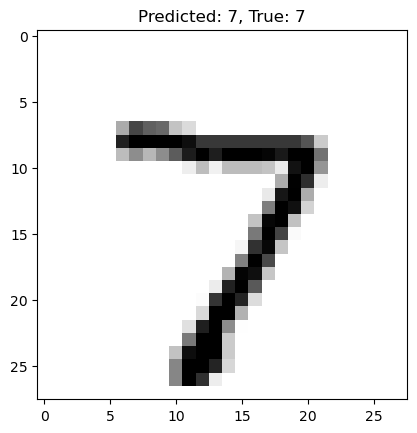

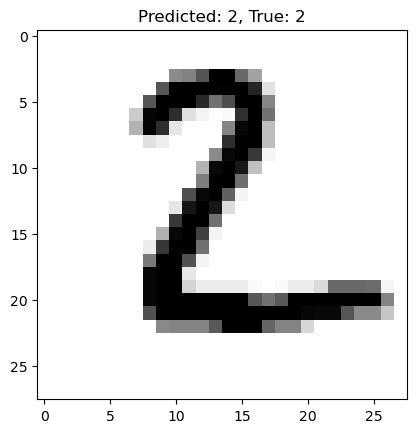

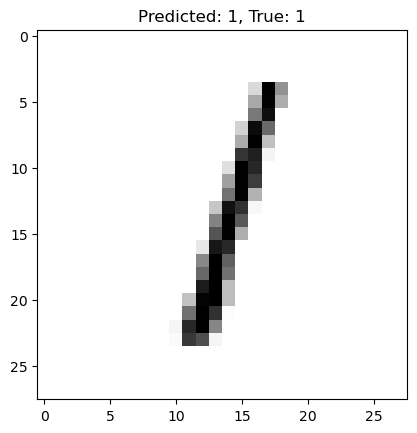

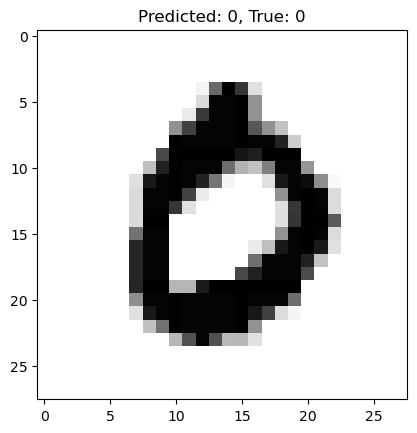

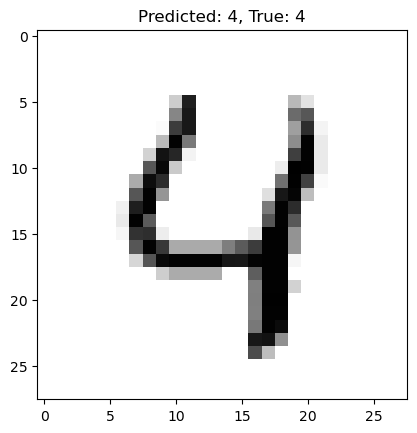

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predict the first 5 test images
predictions = model.predict(x_test[:5])

# Plot the first 5 test images with their predicted labels
for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.show()


If you would like more information on how to use a GPU, check out the following Google Colab tutorial:
- https://colab.research.google.com/notebooks/gpu.ipynb